## Clean and organize basketball player statistics from scraped data.
Preliminary quesiton: how are height and weight related?
Secondary question: do performance metrics correlate with age/experience/height/weight? 
I don't know ANYTHING about basketball so lets try Height?

In [29]:
#relevant imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
players_df = pd.read_pickle('basketballplayers.pkl')

In [3]:
players_df.head()

,displayName,firstName,heightFeet,heightInches,isAllStar,jersey,lastName,orderChar,playerUrl,pos,posExpanded,teamData.city,teamData.nickname,teamData.tricode,teamData.urlName,weightPounds,age,years_in_nba
personId,,,,,,,,,,,,,,,,,,
203518,"Abrines, Alex",Alex,6,6,False,8,Abrines,A,/players/alex/abrines/203518,G,Guard,Oklahoma City,Thunder,OKC,thunder,190,25.0,2.0
203112,"Acy, Quincy",Quincy,6,7,False,13,Acy,A,/players/quincy/acy/203112,F,Forward,Brooklyn,Nets,BKN,nets,240,27.0,6.0
1629121,"Adams, Jaylen",Jaylen,6,2,False,,Adams,A,/players/jaylen/adams/1629121,G,Guard,Atlanta,Hawks,ATL,hawks,190,22.0,0.0
203500,"Adams, Steven",Steven,7,0,False,12,Adams,A,/players/steven/adams/203500,C,Center,Oklahoma City,Thunder,OKC,thunder,255,25.0,5.0
1628389,"Adebayo, Bam",Bam,6,10,False,13,Adebayo,A,/players/bam/adebayo/1628389,C-F,Center-Forward,Miami,Heat,MIA,heat,255,21.0,1.0


In [4]:
#convert to numeric and create new column called height
players_df.replace(to_replace = '-', value = np.nan, inplace = True)
players_df['heightFeet'] = pd.to_numeric(players_df.heightFeet)
players_df['heightInches'] = pd.to_numeric(players_df.heightInches)
players_df['height'] = players_df.heightFeet * 12 + players_df.heightInches

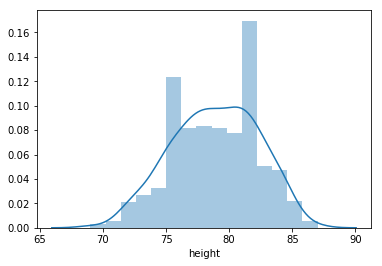

In [5]:
#distribution of heights of basketball plauers
sns.distplot(players_df.height.dropna())

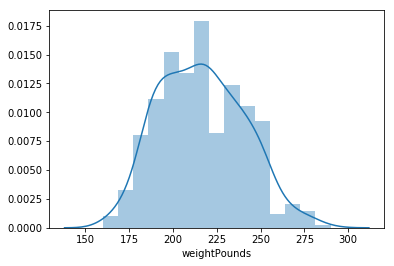

In [6]:
players_df['weightPounds'] = pd.to_numeric(players_df.weightPounds)
sns.distplot(players_df.weightPounds.dropna())



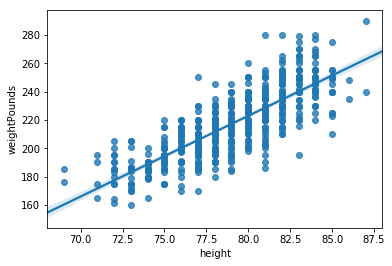

In [7]:
#check height and weight correlation
sns.regplot(x = "height", y = "weightPounds", data = players_df)

In [8]:
#get basketball players stats file and relevant columns. what columns measure performance
stats_df = pd.read_pickle('basketballstats.pkl')

In [9]:
for columnname in stats_df: print(columnname)

_internal.eventName
_internal.pubDateTime
_internal.xslt
league.sacramento.stats.careerSummary.apg
league.sacramento.stats.careerSummary.assists
league.sacramento.stats.careerSummary.blocks
league.sacramento.stats.careerSummary.bpg
league.sacramento.stats.careerSummary.dd2
league.sacramento.stats.careerSummary.defReb
league.sacramento.stats.careerSummary.fga
league.sacramento.stats.careerSummary.fgm
league.sacramento.stats.careerSummary.fgp
league.sacramento.stats.careerSummary.fta
league.sacramento.stats.careerSummary.ftm
league.sacramento.stats.careerSummary.ftp
league.sacramento.stats.careerSummary.gamesPlayed
league.sacramento.stats.careerSummary.gamesStarted
league.sacramento.stats.careerSummary.min
league.sacramento.stats.careerSummary.mpg
league.sacramento.stats.careerSummary.offReb
league.sacramento.stats.careerSummary.pFouls
league.sacramento.stats.careerSummary.plusMinus
league.sacramento.stats.careerSummary.points
league.sacramento.stats.careerSummary.ppg
league.sacramento.s

In [10]:
#index stats by player_ID
stats_df.set_index(['player_ID'], inplace = True)
points = stats_df['league.standard.stats.careerSummary.points']
#convert to numerics
points = pd.to_numeric(points)

In [11]:
#create a new dataframe with players_ID as index, height and career points
points.head()

player_ID
203518      759.0
203112     1625.0
1629121      -1.0
203500     3399.0
1628389      37.0
Name: league.standard.stats.careerSummary.points, dtype: float64

In [12]:
#rename index to ID in both players_df and points
points.index.rename('ID',inplace = True)
players_df.index.rename('ID',inplace = True)

In [13]:
#add points to players df
players_df = players_df.join(points)

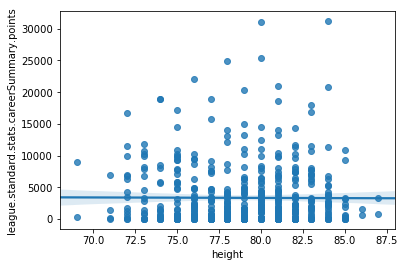

In [14]:
#is their a correlation between height and career points? Apparently not really!
sns.regplot(x = 'height', y = 'league.standard.stats.careerSummary.points', data = players_df)

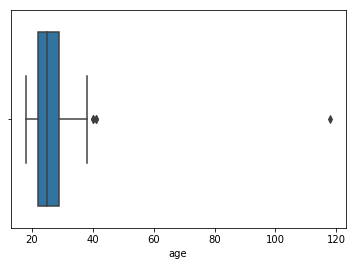

In [15]:
#what is the distribution of players age?
sns.boxplot(players_df.age.dropna())

In [16]:
#nobody is 120 years old, change this to NaN
players_df.loc[players_df.age >50, 'age'] = np.nan

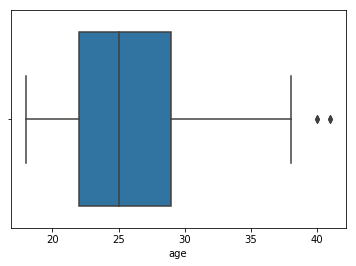

In [17]:
sns.boxplot(players_df.age.dropna())

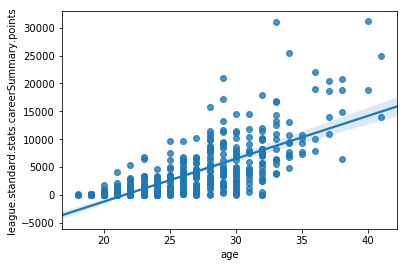

In [18]:
#what about points and age?
sns.regplot(x = 'age', y = 'league.standard.stats.careerSummary.points', data = players_df)

Since this was just for practice, I may stop here.
Is the average height different between oklahoma city and brooklyn players?



In [23]:
oklahoma_height = players_df[players_df['teamData.city']=='Oklahoma City'].height
brooklyn_height = players_df[players_df['teamData.city']=='Brooklyn'].height

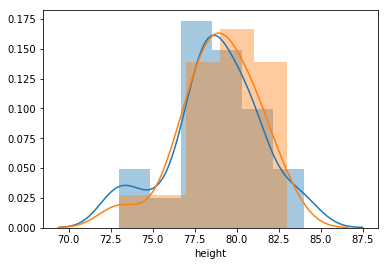

In [26]:
sns.distplot(oklahoma_height.dropna())
sns.distplot(brooklyn_height.dropna())

In [31]:
oklahoma_height.dropna()

ID
203518     78.0
203500     84.0
201147     81.0
1629126    77.0
1628977    77.0
1628408    78.0
101109     73.0
1628390    79.0
202331     81.0
203924     81.0
1628985    78.0
1627772    79.0
1628987    80.0
203962     79.0
1627789    78.0
1627846    78.0
203457     83.0
202335     81.0
203460     79.0
203471     73.0
202713     80.0
201566     75.0
Name: height, dtype: float64

In [33]:
brooklyn_height.dropna()

ID
203112     79.0
1628386    83.0
201960     80.0
203459     78.0
202334     82.0
203915     78.0
1628495    76.0
201162     79.0
202702     80.0
1626203    77.0
203925     78.0
1626178    79.0
1629066    81.0
1627747    79.0
1629058    81.0
203894     73.0
1626156    77.0
1627821    81.0
Name: height, dtype: float64

In [34]:
#for such small datasets I'm doing a Mann Whitney U Test.
mannwhitneyu(oklahoma_height.dropna(),brooklyn_height.dropna())

MannwhitneyuResult(statistic=189.0, pvalue=0.40755802426501975)

### The two height populations are not significant. 